In [1]:
import tensorflow as tf
from keras.layers import Dense, Conv2D, GlobalAveragePooling2D
from tfkan.layers import DenseKAN, Conv2DKAN

import numpy as np
from matplotlib import pyplot as plt

In [2]:
# load fashion-mnist dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
# normalize data
x_train = np.expand_dims(x_train / 255.0, axis=-1).astype(np.float32)
x_test = np.expand_dims(x_test / 255.0, axis=-1).astype(np.float32)

In [5]:
# MLP
mlp = tf.keras.models.Sequential([
    Conv2D(filters=32, kernel_size=5, strides=2, padding='valid', activation='relu'),
    Conv2D(filters=64, kernel_size=5, strides=2, padding='valid', activation='relu'),
    GlobalAveragePooling2D(),
    Dense(10, activation='softmax')
])
mlp.build(input_shape=(None, 28, 28, 1))
mlp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 12, 12, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 64)          51264     
                                                                 
 global_average_pooling2d_1  (None, 64)                0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
Total params: 52746 (206.04 KB)
Trainable params: 52746 (206.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
%%time
mlp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
mlp_history = mlp.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
469/469 [==============================] - 4s 7ms/step - loss: 0.9562 - accuracy: 0.6611 - val_loss: 0.7179 - val_accuracy: 0.7435
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.6556 - accuracy: 0.7586 - val_loss: 0.6187 - val_accuracy: 0.7774
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.5808 - accuracy: 0.7896 - val_loss: 0.5698 - val_accuracy: 0.7963
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.5380 - accuracy: 0.8084 - val_loss: 0.5563 - val_accuracy: 0.8016
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.5107 - accuracy: 0.8176 - val_loss: 0.5323 - val_accuracy: 0.8130
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.4825 - accuracy: 0.8297 - val_loss: 0.5010 - val_accuracy: 0.8194
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.4664 - accuracy: 0.8343 - val_loss: 0.4834 - val_accuracy: 0.8282
Epoch 

In [3]:
# KAN
kan = tf.keras.models.Sequential([
    Conv2DKAN(filters=8, kernel_size=5, strides=2, padding='valid', kan_kwargs={'grid_size': 3}),
    tf.keras.layers.LayerNormalization(),
    Conv2DKAN(filters=16, kernel_size=5, strides=2, padding='valid', kan_kwargs={'grid_size': 3}),
    GlobalAveragePooling2D(),
    DenseKAN(10, grid_size=3),
    tf.keras.layers.Softmax()
])
kan.build(input_shape=(None, 28, 28, 1))
kan.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2dkan (Conv2DKAN)       (None, 12, 12, 8)         1658      
                                                                 
 layer_normalization (Layer  (None, 12, 12, 8)         16        
 Normalization)                                                  
                                                                 
 conv2dkan_1 (Conv2DKAN)     (None, 4, 4, 16)          24416     
                                                                 
 global_average_pooling2d (  (None, 16)                0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_kan (DenseKAN)        (None, 10)                1290      
                                                                 
 softmax (Softmax)           (None, 10)                0

In [4]:
%%time
kan.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
kan_history = kan.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
469/469 [==============================] - 64s 134ms/step - loss: 1.0546 - accuracy: 0.6387 - val_loss: 0.7451 - val_accuracy: 0.7355
Epoch 2/10
469/469 [==============================] - 64s 136ms/step - loss: 0.6589 - accuracy: 0.7642 - val_loss: 0.6359 - val_accuracy: 0.7747
Epoch 3/10
469/469 [==============================] - 64s 136ms/step - loss: 0.5815 - accuracy: 0.7896 - val_loss: 0.6094 - val_accuracy: 0.7815
Epoch 4/10
469/469 [==============================] - 64s 136ms/step - loss: 0.5410 - accuracy: 0.8045 - val_loss: 0.5606 - val_accuracy: 0.8008
Epoch 5/10
469/469 [==============================] - 60s 128ms/step - loss: 0.5111 - accuracy: 0.8152 - val_loss: 0.5550 - val_accuracy: 0.7952
Epoch 6/10
469/469 [==============================] - 59s 126ms/step - loss: 0.4881 - accuracy: 0.8234 - val_loss: 0.5081 - val_accuracy: 0.8192
Epoch 7/10
469/469 [==============================] - 58s 124ms/step - loss: 0.4709 - accuracy: 0.8291 - val_loss: 0.4859 - val_ac

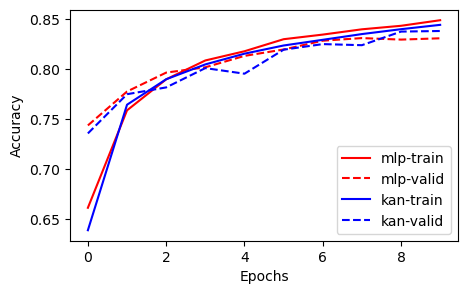

In [7]:
# plot history
fig = plt.figure(figsize=(5,3))
plt.plot(mlp_history.history['accuracy'], label='mlp-train', ls="-", color="red")
plt.plot(mlp_history.history['val_accuracy'], label='mlp-valid', ls="--", color="red")
plt.plot(kan_history.history['accuracy'], label='kan-train', ls="-", color="blue")
plt.plot(kan_history.history['val_accuracy'], label='kan-valid', ls="--", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()